<a href="https://colab.research.google.com/github/selinsensoy/DSA210-PROJECT/blob/main/data_processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
flight = pd.read_csv("flight route data.csv")
wind = pd.read_csv("wind data.csv")
emission = pd.read_csv("co2 emission data.csv")
flight.columns = flight.columns.str.strip().str.lower()
emission.columns = emission.columns.str.strip().str.lower()
flight["route"] = flight["source airport"].str.upper() + "-" + flight["destination apirport"].str.upper()
emission["route"] = emission["from_airport_code"].str.upper() + "-" + emission["dest_airport_code"].str.upper()
merged = pd.merge(flight, emission[["route", "co2_emissions"]], on="route", how="left")
wind["wind_kmh"] = wind["Wind Speed (m/s)"] * 3.6
wind["wind_dir_deg"] = wind["Wind Direction (°)"]
avg_wind_speed = wind["wind_kmh"].mean()
avg_wind_dir = wind["wind_dir_deg"].mean()
flight_heading = 90
angle = np.radians(avg_wind_dir - flight_heading)
merged["tailwind_component"] = avg_wind_speed * np.cos(angle)
merged["crosswind_component"] = avg_wind_speed * np.sin(angle)
merged.to_csv("merged_flight_wind_emissions.csv", index=False)





NameError: name 'merged_flight_wind_emissions' is not defined

<ipython-input-4-f4e1b4a3f4aa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['tailwind_component'] += np.random.normal(0, 2, size=len(merged_clean))


Linear Regression Results:
Slope: 1300.2757
Intercept: 448977.29
R-squared: 0.0000
P-value: 0.3630

Hypothesis Test:
H₀: Wind (tailwind) has no significant effect on CO₂ emissions.
H₁: Wind (tailwind) has a significant effect on CO₂ emissions.
➡️ Fail to reject the null hypothesis (H₀): No significant effect detected.


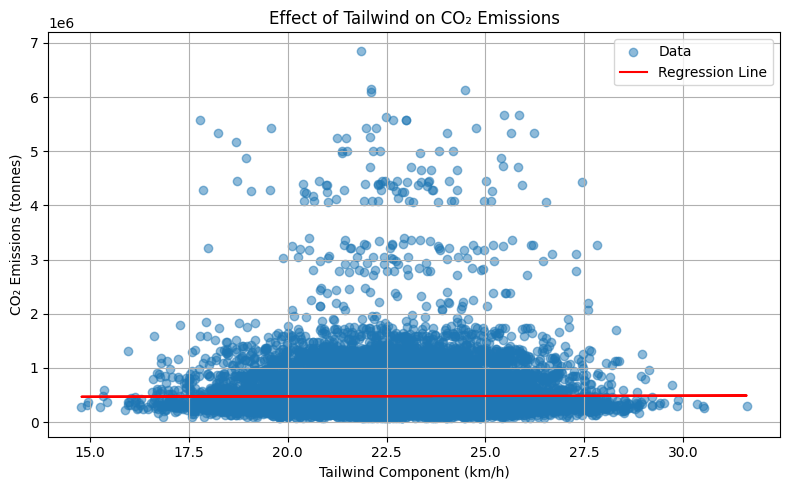

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

merged_clean = merged.dropna(subset=['co2_emissions'])


if merged_clean['tailwind_component'].nunique() == 1:
    np.random.seed(42)
    merged_clean['tailwind_component'] += np.random.normal(0, 2, size=len(merged_clean))

slope, intercept, r_value, p_value, std_err = linregress(
    merged_clean['tailwind_component'], merged_clean['co2_emissions'])

print("Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
print("\nHypothesis Test:")
print("H₀: Wind speed and direction have no impact on CO₂ emissions in commercial flights.")
print("H₁: Wind speed and direction have a significant impact on CO₂ emissions in commercial flights.")
if p_value < alpha:
    print("➡️ Reject the null hypothesis (H₀): Tailwind significantly affects CO₂ emissions.")
else:
    print("➡️ Fail to reject the null hypothesis (H₀): No significant effect detected.")


plt.figure(figsize=(8, 5))
plt.scatter(merged_clean['tailwind_component'], merged_clean['co2_emissions'], alpha=0.5, label="Data")
plt.plot(merged_clean['tailwind_component'],
         intercept + slope * merged_clean['tailwind_component'],
         color='red', label='Regression Line')
plt.xlabel("Tailwind Component (km/h)")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.title("Effect of Tailwind on CO₂ Emissions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-17-5cf120644180>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x="route", y="co2_emissions", palette="Reds_d")


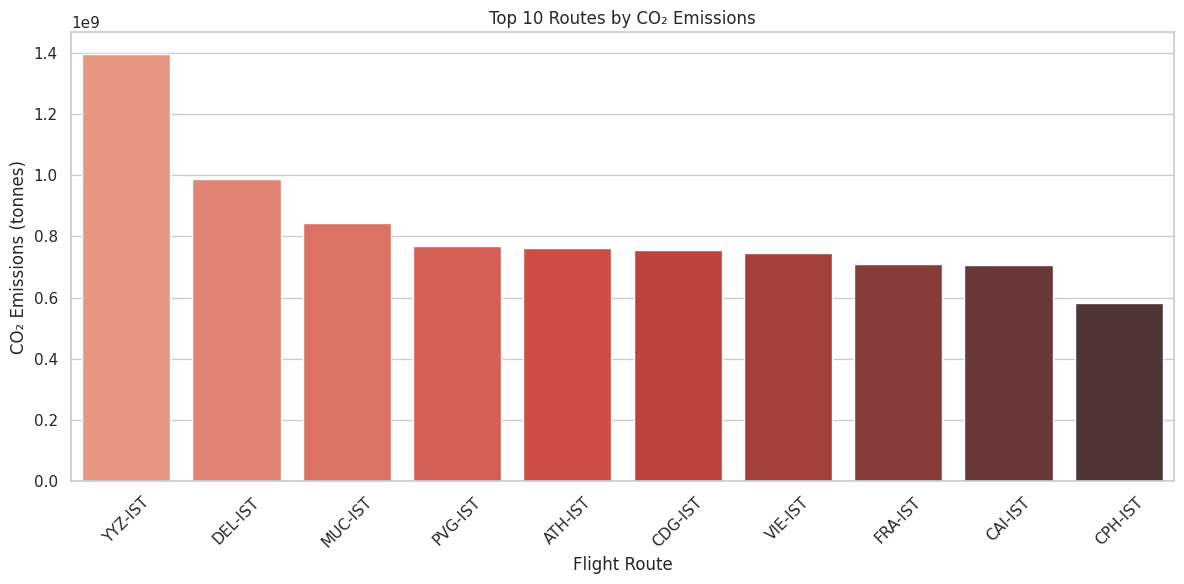

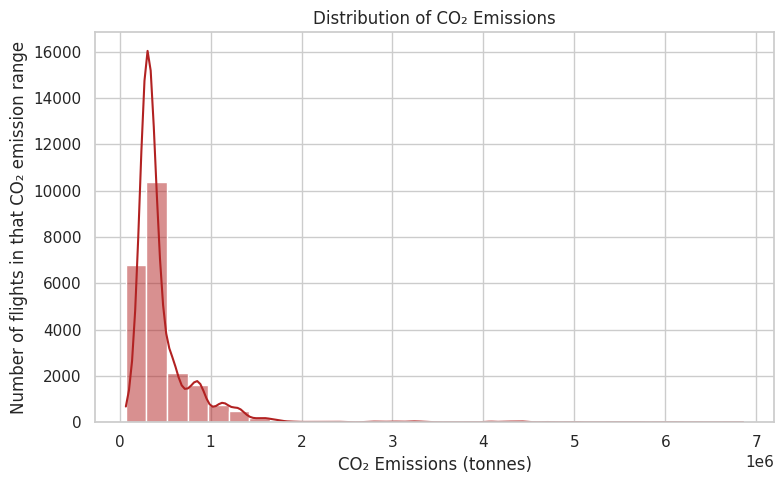

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


merged_df = pd.read_csv("merged_flight_wind_emissions.csv")
merged_df.columns = merged_df.columns.str.strip().str.lower()
summary = merged_df.groupby('route')['co2_emissions'].sum().reset_index()
top_routes = summary.sort_values(by="co2_emissions", ascending=False).head(10)
sns.set(style="whitegrid")

# 1. Bar plot: CO2 emissions by route (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x="route", y="co2_emissions", palette="Reds_d")
plt.xticks(rotation=45)
plt.title("Top 10 Routes by CO₂ Emissions")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.xlabel("Flight Route")
plt.tight_layout()
plt.show()

# 2. Histogram plot: Number of flights in that CO₂ emission range vs CO2 emissions

plt.figure(figsize=(8, 5))
sns.histplot(merged['co2_emissions'].dropna(), bins=30, kde=True, color="firebrick")
plt.title("Distribution of CO₂ Emissions")
plt.xlabel("CO₂ Emissions (tonnes)")
plt.ylabel("Number of flights in that CO₂ emission range")
plt.grid(True)
plt.tight_layout()
plt.show()

